## 8.2 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

### Text Tokenization

### NLTK 패키지 : 가장 고전적인 패키지, 요즘은 잘 사용안함. 

In [ ]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


In [ ]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [ ]:
from nltk import word_tokenize, sent_tokenize

#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
    
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#여러 문장들에 대해 문장별 단어 토큰화 수행. 
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### n-gram

In [ ]:
from nltk import ngrams

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)

all_ngrams = ngrams(words, 3) 
ngrams = [ngram for ngram in all_ngrams]
print(ngrams)

[('The', 'Matrix', 'is'), ('Matrix', 'is', 'everywhere'), ('is', 'everywhere', 'its'), ('everywhere', 'its', 'all'), ('its', 'all', 'around'), ('all', 'around', 'us'), ('around', 'us', ','), ('us', ',', 'here'), (',', 'here', 'even'), ('here', 'even', 'in'), ('even', 'in', 'this'), ('in', 'this', 'room'), ('this', 'room', '.')]


### Stopwords 제거

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# corpus라는 말뭉치 
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [ ]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다. 
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
    
print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### Stemming과 Lemmatization

In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
# 품사를 넣어줘야한다. 동사의 경우 v, 형용사의 경우 a 
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
amuse amuse amuse
happy happy
fancy fancy


## 8.3 Bag of Words – BOW

- Bag of Words 모델은 모델은 문서가 가지는 모든 단어(words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델입니다. 문서 내 모든 단어를 한꺼번에 봉투(bag)안에 넣은 뒤에 흔들어서 섞는다는 의미로 Bag of Words(BOW)모델이라고 합니다. 

문장 1 : 'My wife likes to watch baseball games and my daughter likes to watch baseball games too' 
문장2 : 'My wife likes to play baseball' 

- 1. 문장 1과 문장 2에 있는 모든 단어에서 중복을 제거하고 각 단어를 컬럼 형태로 나열합니다. 그러고 나서 각 단어에 고유의 인덱스를 다음과 같이 부여합니다. 

- 2. 문장에서 해당 단어가 나타나는 횟수(occurrence)를 단어(단어 인덱스)에 기재합니다. 예를 들어 baseball은 문장 1,2에서 총 2번 나타나며, daughter는 문장 1에서만 1번 나타납니다.

![](image/8-2.png)

### 장점 
- 쉽고 빠른 구축 
- 예상보다 문서의 특징을 잘 나타내어 전통적으로 여러분야에서 활용도가 높음 
- 워드투벡에 비해 크게 떨어지지 않는다. 
### 단점 
- 문맥 의미(Semantic Context)반영 문제 
- 희소 행렬 문제 






## BOW 피처 벡터화 유형 

- 단순 카운트 기반의 벡터화 : 단어 피처에 값을 부여할 때 각 문서에서 해당 단어가 나타나는 횟수, 즉 Count를 부여하는 경우를 카운트  벡터화라고 합니다. 카운트 벡터화에서는 카운트 값이 높을수록 중요한 단어로 인식됩니다. 

- TF-IDF 벡터화 : 카운트만 부여할 경우 그 문서의 특징을 나타내기보다는 언어의 특성상 문자에서 자주 사용될 수 밖에 없는 단어까지 높은 값을 부여하게 됩니다. 이러한 문제를 보완하기 위해 TF-IDF(Tern Frequency Inverse Document Frequency) 벡터화를 사용합니다. 
TF - IDF는 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여합니다. 

###  TF-IDF(Tern Frequency Inverse Document Frequency)
- 특정 단어가 다은 문서에는 나타나지 않고 특정 문서에서만 자주 사용된다면 해당 단어는 해당 문서를 잘 특정짓는 중요 단어일 가능성이 높음 
- 특정 단어가 매우 많은 여러 문서에서 빈번히 나타난다면 해당 단어는 개별 문서를 특정짓는 정보로서의 의미를 상실 

**TF(Trem Frequency)** : 문서에서 해당 단어가 얼마나 나왔는지를 나타내는 지표 
**DF(Document Frequency)** : 해당 단어가 몇 개의 문서에서 나타났는지를 나타내는 지표 
**IDF(Inverce Document Frequency)** : DF의 역수로서 전체 문서수/ DF 

## 텍스트의 피처 벡터화 유형 

- Document Term Matrix(문서 단어 행렬)  : 개별 문서(또는 문장)을 단어들의 횟수나 정규화 변환된 횟수로 표현

- Word Embedding(Word2Vec) : 개별 단어를 문맥을 가지는 N차원 공간에 벡터로 표현

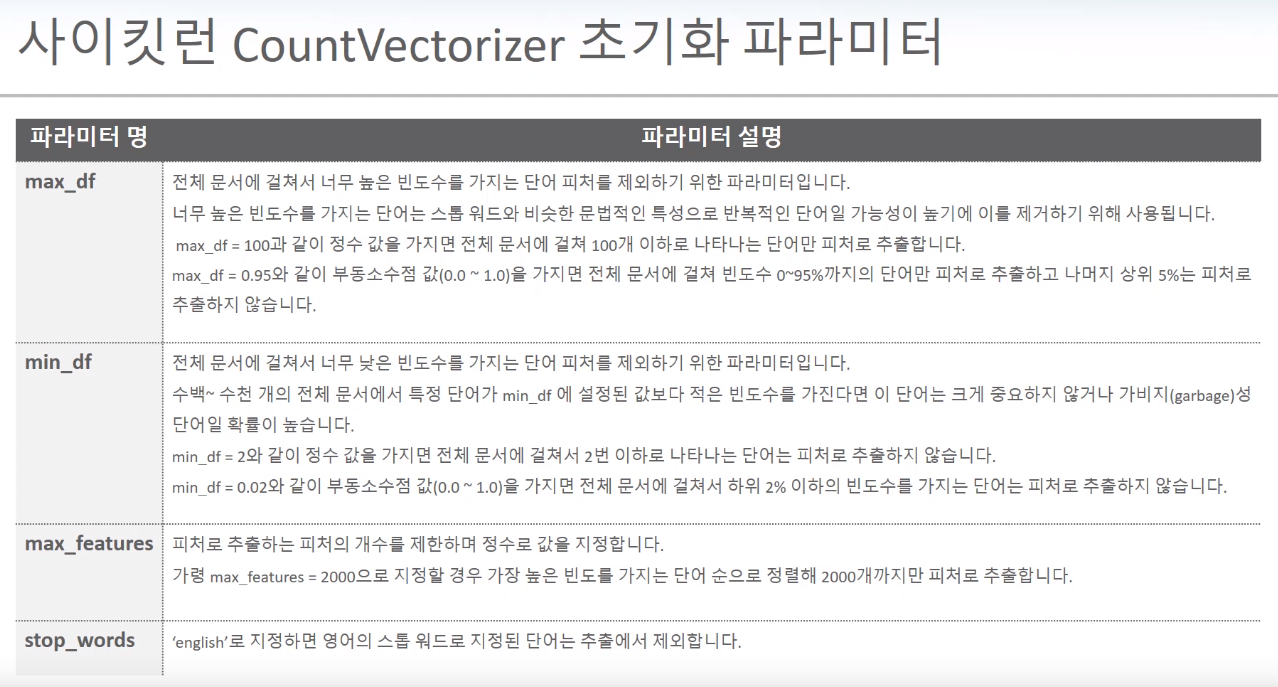

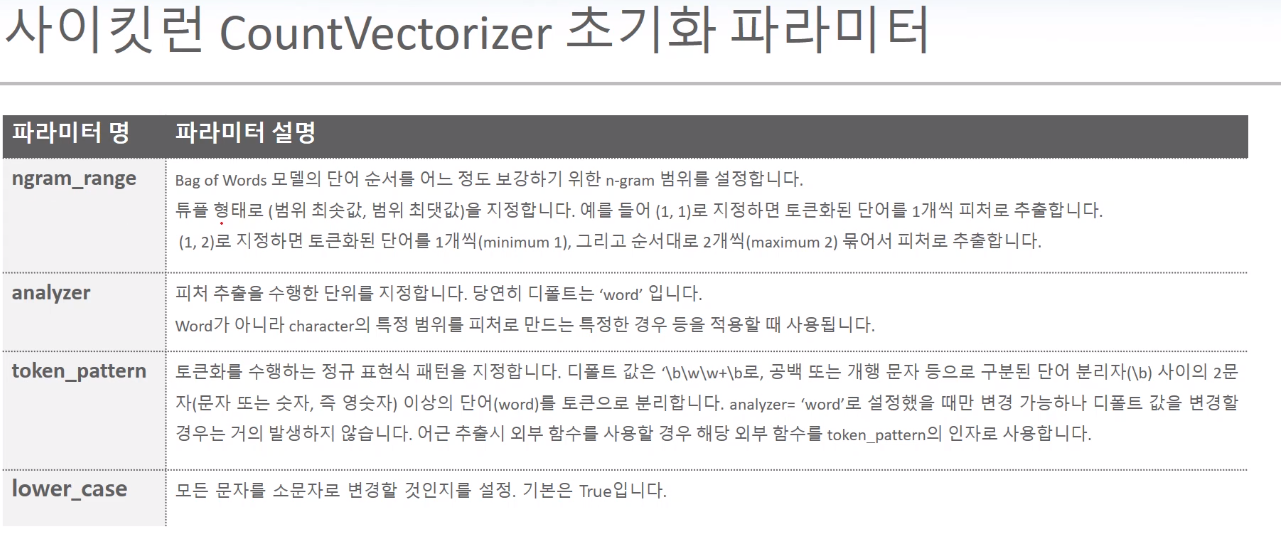

### 사이킷런 CountVectorizer 테스트

In [ ]:

text_sample_01 = 'The Matrix is everywhere its all around us, here even in this room. \
                  You can see it out your window or on your television. \
                  You feel it when you go to work, or go to church or pay your taxes.'
text_sample_02 = 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe\
                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'
text=[]
text.append(text_sample_01); text.append(text_sample_02)
print(text,"\n", len(text))

['The Matrix is everywhere its all around us, here even in this room.                   You can see it out your window or on your television.                   You feel it when you go to work, or go to church or pay your taxes.', 'You take the blue pill and the story ends.  You wake in your bed and you believe whatever you want to believe                  You take the red pill and you stay in Wonderland and I show you how deep the rabbit-hole goes.'] 
 2


### CountVectorizer객체 생성 후 fit(), transform()으로 텍스트에 대한 feature vectorization 수행



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorization으로 feature extraction 변환 수행. 
cnt_vect = CountVectorizer()
cnt_vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
ftr_vect = cnt_vect.transform(text)

ngram_range 확인

In [ ]:

cnt_vect = CountVectorizer(ngram_range=(1,3))
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 201)
{'the': 129, 'matrix': 77, 'is': 66, 'everywhere': 40, 'its': 74, 'all': 0, 'around': 11, 'us': 150, 'here': 51, 'even': 37, 'in': 59, 'this': 140, 'room': 106, 'you': 174, 'can': 25, 'see': 109, 'it': 69, 'out': 90, 'your': 193, 'window': 165, 'or': 83, 'on': 80, 'television': 126, 'feel': 43, 'when': 162, 'go': 46, 'to': 143, 'work': 171, 'church': 28, 'pay': 93, 'taxes': 125, 'the matrix': 132, 'matrix is': 78, 'is everywhere': 67, 'everywhere its': 41, 'its all': 75, 'all around': 1, 'around us': 12, 'us here': 151, 'here even': 52, 'even in': 38, 'in this': 60, 'this room': 141, 'room you': 107, 'you can': 177, 'can see': 26, 'see it': 110, 'it out': 70, 'out your': 91, 'your window': 199, 'window or': 166, 'or on': 86, 'on your': 81, 'your television': 197, 'television you': 127, 'you feel': 179, 'feel it': 44, 'it when': 72, 'when you': 163, 'you go': 181, 'go to': 47, 'to work': 148, 'work or': 172, 'or go': 84, 'to church': 146, '

피처 벡터화 후 데이터 유형 및 여러 속성 확인 

In [ ]:
print(type(ftr_vect), ftr_vect.shape)
print(ftr_vect)

<class 'scipy.sparse.csr.csr_matrix'> (2, 201)
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 25)	1
  (0, 26)	1
  (0, 27)	1
  (0, 28)	1
  (0, 29)	1
  (0, 30)	1
  (0, 37)	1
  (0, 38)	1
  (0, 39)	1
  (0, 40)	1
  (0, 41)	1
  (0, 42)	1
  (0, 43)	1
  (0, 44)	1
  (0, 45)	1
  (0, 46)	2
  (0, 47)	2
  (0, 48)	1
  (0, 49)	1
  :	:
  (1, 156)	1
  (1, 157)	1
  (1, 158)	1
  (1, 159)	1
  (1, 160)	1
  (1, 161)	1
  (1, 168)	1
  (1, 169)	1
  (1, 170)	1
  (1, 174)	7
  (1, 175)	1
  (1, 176)	1
  (1, 183)	1
  (1, 184)	1
  (1, 185)	1
  (1, 186)	1
  (1, 187)	2
  (1, 188)	2
  (1, 189)	1
  (1, 190)	1
  (1, 191)	1
  (1, 192)	1
  (1, 193)	1
  (1, 194)	1
  (1, 195)	1


In [ ]:
print(cnt_vect.vocabulary_)

{'the': 129, 'matrix': 77, 'is': 66, 'everywhere': 40, 'its': 74, 'all': 0, 'around': 11, 'us': 150, 'here': 51, 'even': 37, 'in': 59, 'this': 140, 'room': 106, 'you': 174, 'can': 25, 'see': 109, 'it': 69, 'out': 90, 'your': 193, 'window': 165, 'or': 83, 'on': 80, 'television': 126, 'feel': 43, 'when': 162, 'go': 46, 'to': 143, 'work': 171, 'church': 28, 'pay': 93, 'taxes': 125, 'the matrix': 132, 'matrix is': 78, 'is everywhere': 67, 'everywhere its': 41, 'its all': 75, 'all around': 1, 'around us': 12, 'us here': 151, 'here even': 52, 'even in': 38, 'in this': 60, 'this room': 141, 'room you': 107, 'you can': 177, 'can see': 26, 'see it': 110, 'it out': 70, 'out your': 91, 'your window': 199, 'window or': 166, 'or on': 86, 'on your': 81, 'your television': 197, 'television you': 127, 'you feel': 179, 'feel it': 44, 'it when': 72, 'when you': 163, 'you go': 181, 'go to': 47, 'to work': 148, 'work or': 172, 'or go': 84, 'to church': 146, 'church or': 29, 'or pay': 88, 'pay your': 94, '

In [ ]:
cnt_vect = CountVectorizer(max_features=5, stop_words='english')
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 5)
{'window': 4, 'pill': 1, 'wake': 2, 'believe': 0, 'want': 3}



ngram_range 확인

In [ ]:
cnt_vect = CountVectorizer(ngram_range=(1,3))
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (2, 201)
{'the': 129, 'matrix': 77, 'is': 66, 'everywhere': 40, 'its': 74, 'all': 0, 'around': 11, 'us': 150, 'here': 51, 'even': 37, 'in': 59, 'this': 140, 'room': 106, 'you': 174, 'can': 25, 'see': 109, 'it': 69, 'out': 90, 'your': 193, 'window': 165, 'or': 83, 'on': 80, 'television': 126, 'feel': 43, 'when': 162, 'go': 46, 'to': 143, 'work': 171, 'church': 28, 'pay': 93, 'taxes': 125, 'the matrix': 132, 'matrix is': 78, 'is everywhere': 67, 'everywhere its': 41, 'its all': 75, 'all around': 1, 'around us': 12, 'us here': 151, 'here even': 52, 'even in': 38, 'in this': 60, 'this room': 141, 'room you': 107, 'you can': 177, 'can see': 26, 'see it': 110, 'it out': 70, 'out your': 91, 'your window': 199, 'window or': 166, 'or on': 86, 'on your': 81, 'your television': 197, 'television you': 127, 'you feel': 179, 'feel it': 44, 'it when': 72, 'when you': 163, 'you go': 181, 'go to': 47, 'to work': 148, 'work or': 172, 'or go': 84, 'to church': 146, '

### 희소 행렬 - COO 형식

In [ ]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )

In [ ]:
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))

In [ ]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

## CountVectorizer 를 이용한 피처 벡터화 

- 사전 데이터 가공 : 모든 문자를 소문자로 변환하는 등의 사전 작업 수행(Default로 lowercase = True임)  

- 토큰화 : Default는 단어 기준(analyzer = True)이며, n_gram_range를 반영하여 토큰화 수행

- 텍스트 정규화 : stop Words 필터링만 수행, Stemmer, Lemmatize는 CountVectorizer 자체에서는 지원되지 않음, 이를 위한 함수를 만들거나 외부 패키지로 미리 Text Normalization 수행 필요 

- 피처 벡터화 : max_df, min_df, max_features 등의 파라미터를 반영하여 Token된 단어들을 feature extraction 후 vectorization 적용 

## 희소 행렬의 저장 변환 형식 

- COO 형식 : Coordinate(좌표)방식을 의미하며 0이 아닌 데이터만 별도의 배열(Array)에 저장하고 그 데이터를 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식 

- CSR 형식 : COO 형식이 위치 배열값을 중복적으로 가지는 문제를 해결한 방식. 일반적으로 CSR 형식이 COO보다 많이 사용됨. 

파이썬에서는 희소 행렬을 COO, CSR 형식으로 변환하기 위해서 Scipy의 coo_matrix(), csr_matrix()함수를 이용합니다. 

### 희소 행렬 – CSR 형식

In [ ]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환 
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환 
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())


COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)